In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()

In [3]:
input_data=np.array(data.data)
output_data=np.array(data.target)
print("The shape of the input_data {} and output_data {}".format(input_data.shape,output_data.shape))
unique_target_groups=np.unique(output_data)
unique_target_groups

The shape of the input_data (11314,) and output_data (11314,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
input_data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_data,output_data,random_state=0)
print("Training data X_train:{} Y_train:{}".format(X_train.shape,Y_train.shape))
print("Testing_data X_test:{} Y_test {}".format(X_test.shape,Y_test.shape))

Training data X_train:(8485,) Y_train:(8485,)
Testing_data X_test:(2829,) Y_test (2829,)


## Steps to solve the problem:

### 1.Seperate X_train and X_test from original data
### 2. Take the training data and find the dictionary and choose top -2000 words from X_train.
### 3. Similar task should be performed on X_test..

stop_words_list=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [6]:
def remove_stop_words_list(single_data_point):
    stop_words_list=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","is"]
    lst=[word for word in single_data_point if word not in stop_words_list]
    return lst

In [7]:
def remove_special_symbols(single_data_point):
    single_data_point=[word for word in single_data_point if word.isalnum()]
    lst=[word for word in single_data_point if word.isalpha()]
    return lst
    #lst=[word for word in single_data_point if is_ascii_word(word)]

In [8]:
my_word_dictionary={}

In [9]:
for i in range(X_train.shape[0]):
    single_data_point=X_train[i]
    #print(single_data_point)
    #from ast import literal_eval
    #single_data_point=literal_eval(single_data_point)
    single_data_point=single_data_point.lower().split(" ")
    single_data_point=remove_special_symbols(single_data_point)
    single_data_point=remove_stop_words_list(single_data_point)
    #print(single_data_point)
    for word in single_data_point:
        my_word_dictionary[word]=my_word_dictionary.get(word,0)+1

In [10]:
len(my_word_dictionary)

41627

In [11]:
type(my_word_dictionary)

dict

In [12]:
my_word_dictionary=[(v,k) for k,v in sorted(my_word_dictionary.items())]

In [13]:
my_word_dictonary=[(v,k) for k,v in sorted(my_word_dictionary,reverse=True)]

In [14]:
my_word_dictionary.sort(reverse=True)

In [15]:
len(my_word_dictionary)

41627

In [16]:
sorted_dictionary=[(k,v) for v,k in my_word_dictionary]
final_dict=sorted_dictionary[:2000]
sorted_dictionary=dict(sorted_dictionary)

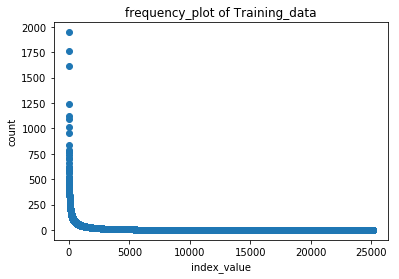

In [46]:
import matplotlib.pyplot as plt
x=np.arange(len(sorted_dictionary))
plt.scatter(x,sorted_dictionary.values())
plt.title('frequency_plot of Training_data')
plt.xlabel('index_value')
plt.ylabel('count')
plt.show()

In [43]:
final_dict=dict(final_dict)
x_np_data=np.array([np.zeros(len(final_dict))]*X_train.shape[0],dtype='int64')
x_pd_data=pd.DataFrame(x_np_data)
x_pd_data.columns=final_dict.keys()
x_pd_data.head()

,would,one,article,like,get,people,know,think,use,university,...,corporation,concerned,chose,chief,channel,cable,burst,bottom,bell,ban
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for i in range(X_train.shape[0]):
    single_data_point=X_train[i]
    single_data_point=single_data_point.lower().split(" ")
    single_data_point=remove_special_symbols(single_data_point)
    single_data_point=remove_stop_words_list(single_data_point)
    for word in single_data_point:
        if word in final_dict:
            x_pd_data.iloc[i][word]=x_pd_data.iloc[i][word]+1

In [20]:
sorted_dictionary

{'would': 5810,
 'one': 4849,
 'article': 4785,
 'like': 3650,
 'get': 3280,
 'people': 3256,
 'know': 2992,
 'think': 2768,
 'university': 2585,
 'use': 2551,
 'new': 2532,
 'also': 2319,
 'could': 2199,
 'good': 2114,
 'may': 2077,
 'even': 2014,
 'make': 1861,
 'many': 1821,
 'two': 1761,
 'see': 1732,
 'much': 1686,
 'time': 1641,
 'need': 1615,
 'want': 1562,
 'first': 1555,
 'way': 1499,
 'anyone': 1499,
 'used': 1436,
 'us': 1436,
 'say': 1424,
 'go': 1387,
 'going': 1329,
 'really': 1298,
 'still': 1273,
 'right': 1269,
 'find': 1218,
 'something': 1215,
 'computer': 1214,
 'using': 1210,
 'take': 1208,
 'believe': 1202,
 'said': 1183,
 'since': 1175,
 'might': 1169,
 'must': 1156,
 'work': 1138,
 'last': 1129,
 'state': 1122,
 'got': 1096,
 'system': 1093,
 'back': 1066,
 'never': 1059,
 'god': 1057,
 'without': 1002,
 'problem': 969,
 'number': 961,
 'please': 949,
 'sure': 927,
 'read': 925,
 'someone': 924,
 'part': 923,
 'help': 921,
 'well': 917,
 'better': 917,
 'made': 

In [21]:
ans=x_pd_data.iloc[999]
indexers=list(final_dict.keys())
#print((indexers))
for index,value in enumerate(ans):
    if value!=0:
        print("{}:{}".format(indexers[index],value))

would:1
get:1
university:1
new:1
many:1
take:1
believe:1
let:1
following:1
free:2
certainly:1
price:1
major:1
light:2
hold:1
expressed:1
market:2
places:1
views:1
seriously:1
bottom:1
bet:1


In [22]:
x_pd_data.head()

,would,one,article,like,get,people,know,think,university,use,...,generated,fundamental,detector,curious,cryptography,crimes,compound,civilians,chief,cheaper
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
my_test_dict={}

In [24]:
for i in range(X_test.shape[0]):
    single_data_point=X_test[i]
    #print(single_data_point)
    #from ast import literal_eval
    #single_data_point=literal_eval(single_data_point)
    single_data_point=single_data_point.lower().split(" ")
    single_data_point=remove_special_symbols(single_data_point)
    single_data_point=remove_stop_words_list(single_data_point)
    #print(single_data_point)
    for word in single_data_point:
        my_test_dict[word]=my_test_dict.get(word,0)+1

In [25]:
len(my_test_dict)

25166

25166


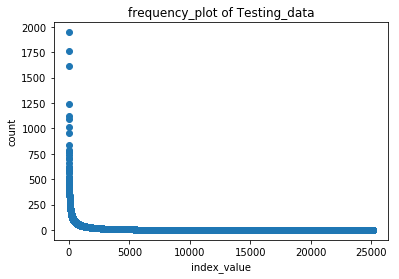

In [26]:
my_test_dict=[(v,k) for k,v in sorted(my_test_dict.items())]
my_word_dictonary=[(v,k) for k,v in sorted(my_test_dict,reverse=True)]
my_test_dict.sort(reverse=True)
print(len(my_test_dict))
sorted_dictionary=[(k,v) for v,k in my_test_dict]
final_dict=sorted_dictionary[:2000]
sorted_dictionary=dict(sorted_dictionary)
import matplotlib.pyplot as plt
plt.close()
x=np.arange(len(sorted_dictionary))
plt.scatter(x,sorted_dictionary.values())
plt.title('frequency_plot of Testing_data')
plt.xlabel('index_value')
plt.ylabel('count')
plt.show()

In [27]:
sorted_dictionary

{'would': 1946,
 'one': 1762,
 'article': 1610,
 'like': 1240,
 'get': 1125,
 'people': 1090,
 'know': 1017,
 'think': 960,
 'use': 840,
 'university': 791,
 'also': 773,
 'could': 767,
 'may': 739,
 'new': 714,
 'even': 703,
 'good': 659,
 'make': 621,
 'many': 617,
 'two': 603,
 'want': 600,
 'much': 581,
 'see': 574,
 'time': 563,
 'need': 525,
 'first': 521,
 'used': 517,
 'anyone': 514,
 'us': 511,
 'way': 494,
 'really': 478,
 'say': 468,
 'find': 460,
 'right': 448,
 'going': 439,
 'go': 436,
 'believe': 430,
 'since': 425,
 'computer': 424,
 'take': 423,
 'still': 420,
 'system': 412,
 'something': 411,
 'must': 402,
 'never': 401,
 'back': 394,
 'using': 388,
 'got': 385,
 'last': 382,
 'said': 378,
 'problem': 370,
 'read': 365,
 'made': 364,
 'might': 360,
 'state': 352,
 'point': 349,
 'someone': 348,
 'information': 344,
 'file': 344,
 'god': 342,
 'another': 340,
 'number': 336,
 'sure': 332,
 'little': 330,
 'work': 328,
 'without': 328,
 'better': 328,
 'give': 327,
 'p

In [28]:
final_dict=dict(final_dict)
x_np_testdata=np.array([np.zeros(len(final_dict))]*X_test.shape[0],dtype='int64')
x_pd_testdata=pd.DataFrame(x_np_testdata)
x_pd_testdata.columns=final_dict.keys()
print(x_pd_testdata.shape)
x_pd_testdata.head()

(2829, 2000)


,would,one,article,like,get,people,know,think,use,university,...,corporation,concerned,chose,chief,channel,cable,burst,bottom,bell,ban
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
for i in range(X_test.shape[0]):
    single_data_point=X_test[i]
    single_data_point=single_data_point.lower().split(" ")
    single_data_point=remove_special_symbols(single_data_point)
    single_data_point=remove_stop_words_list(single_data_point)
    for word in single_data_point:
        if word in final_dict:
            x_pd_testdata.iloc[i][word]=x_pd_testdata.iloc[i][word]+1

In [30]:
x_pd_testdata.head()

,would,one,article,like,get,people,know,think,use,university,...,corporation,concerned,chose,chief,channel,cable,burst,bottom,bell,ban
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Implementing multinomial Gaussian Naive Bayes...

In [31]:
def fit(X_train,Y_train):
    #First initialize the dictionary
   # print(X_train.head())
    MNB={}
    MNB['len']=len(X_train)
    #find unique values of X_train:
    find_unique_values_of_Y_train=np.unique(Y_train)
    #print(find_unique_values_of_Y_train)
    #Now these are my keys of dictionary i need to iterate over it
    for y_label in find_unique_values_of_Y_train:
        MNB[y_label]={}
        # Now i need to take all the column names and need to store the count..
        filtered_data=X_train[Y_train==y_label]
        all_column_names=X_train.columns
        #print(all_column_names)
        for x_label in all_column_names:
            MNB[y_label][x_label]=filtered_data[x_label].sum()
        MNB[y_label]['final_total_of_each_x_label']=X_train[(Y_train==y_label)].shape[0]
    return MNB        

In [32]:
MNB=fit(x_pd_data,Y_train)

In [33]:
print(MNB.get('len'))

8485


In [160]:
def find_proby(MNB,single_test_point,send_all_words,i):
    best_class=i
    best_prob=np.log(MNB.get(best_class).get('final_total_of_each_x_label'))-np.log(MNB.get('len'))
    for word in send_all_words:
        if word not in send_all_words:
            continue
        ratio=np.log(((MNB.get(best_class).get(word,0))+100))-np.log((MNB.get(best_class).get('final_total_of_each_x_label')+MNB.get('len')))
        best_prob+=ratio
    #print(best_prob)
    return best_prob

In [161]:
def find_best_class(MNB,single_test_point,send_all_words):
    get_all_labels=MNB.keys()
    best_class=-1000
    best_probability=-80000
    #Now i have all the labels that are classes i need to iterate over all classes to declare which has the best probability..
    for i in get_all_labels:
        if i is 'len':
            continue
        #Now i need to check through all through all words..
        
        new_probability=find_proby(MNB,single_test_point,send_all_words,i)
        if(new_probability>=best_probability):
            best_probability=new_probability
            best_class=i
    return best_class           

In [162]:
def predict(MNB,X_test):
    y_pred=[]
    send_all_words=X_test.columns
    for each_data_point in range(X_test.shape[0]):
        single_test_point=X_test.iloc[each_data_point]
        class_label=find_best_class(MNB,single_test_point,send_all_words)
        y_pred.append(class_label)
    return y_pred

In [163]:
y_predictions=predict(MNB,x_pd_testdata)

In [164]:
y_predictions=np.array(y_predictions)

In [165]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,y_predictions))
print(confusion_matrix(Y_test,y_predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.00      0.00      0.00       147
          2       0.00      0.00      0.00       140
          3       0.00      0.00      0.00       148
          4       0.00      0.00      0.00       149
          5       0.00      0.00      0.00       159
          6       0.00      0.00      0.00       131
          7       0.00      0.00      0.00       158
          8       0.00      0.00      0.00       162
          9       0.00      0.00      0.00       148
         10       0.00      0.00      0.00       150
         11       0.00      0.00      0.00       155
         12       0.00      0.00      0.00       147
         13       0.00      0.00      0.00       131
         14       0.00      0.00      0.00       154
         15       0.00      0.00      0.00       155
         16       0.00      0.00      0.00       144
         17       0.05      1.00      0.10   

C:\Users\vishnuvardhanreddy\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
from nltk import word_tokenize,sent_tokenize

In [149]:
word_tokenize("hi ra bujji")

['hi', 'ra', 'bujji']

In [150]:
from nltk import pos_tag

In [158]:
pos=pos_tag(word_tokenize("I have been painting since morning.?"))

In [159]:
pos

[('I', 'PRP'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('painting', 'VBG'),
 ('since', 'IN'),
 ('morning', 'NN'),
 ('.', '.'),
 ('?', '.')]